## Introduction to Probability

* Basic Probability
* Conditional Probability
* Simple Probability Distribution
* Probability Mass Function (p.m.f) & Probability Density Function (p.d.f)
* Normal Distribution
* Normal Distribution & Standard Deviation
* Concept of Z-score

In [1]:
# importing all the basic libraries

# for using division module
from __future__ import division

# for basic operations
import pandas as pd
import numpy as np

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
path = "https://raw.githubusercontent.com/sharmaroshan/Statistics-for-Data-Science/master/Datasets/train.csv"

# data = pd.read_csv('Datasets/train.csv')
data = pd.read_csv(path)

# lets check the shape of the dataset
data.shape

(1460, 81)

In [8]:
# lets check the head of the dataset
pd.set_option('display.max_columns', 85)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# !pip install dabl

Target looks like regression
Showing only top 10 of 44 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='SalePrice', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.09E-01'}, xlabel='OverallQual (jittered)', ylabel='SalePrice'>,
         <Axes: title={'center': 'F=7.30E-01'}, xlabel='GrLivArea'>,
         <Axes: title={'center': 'F=6.53E-01'}, xlabel='YearBuilt'>,
         <Axes: title={'center': 'F=6.48E-01'}, xlabel='GarageArea'>,
         <Axes: title={'center': 'F=6.01E-01'}, xlabel='TotalBsmtSF'>],
        [<Axes: title={'center': 'F=5.94E-01'}, xlabel='GarageYrBlt', ylabel='SalePrice'>,
         <Axes: title={'center': 'F=5.74E-01'}, xlabel='1stFlrSF'>,
         <Axes: title={'center': 'F=5.72E-01'}, xlabel='YearRemodAdd'>,
         <Axes: title={'center': 'F=5.31E-01'}, xlabel='TotRmsAbvGrd (jittered)'>,
         <Axes: title={'center': 'F=4.77E-01'}, xlabel='OpenPorchSF'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.22E-01'}, xlabel='SalePrice', ylabel='MSSubClass'>,
         <Axes: title={'cente

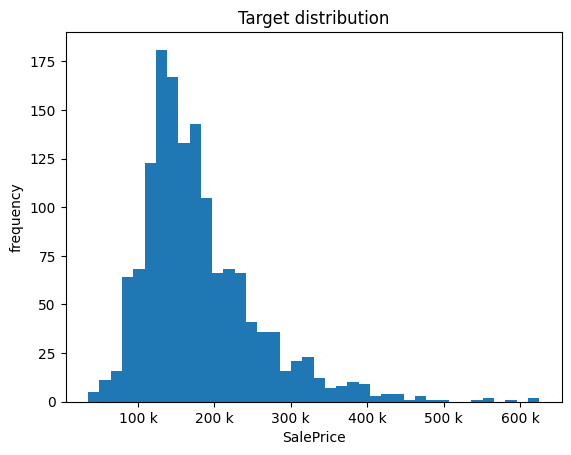

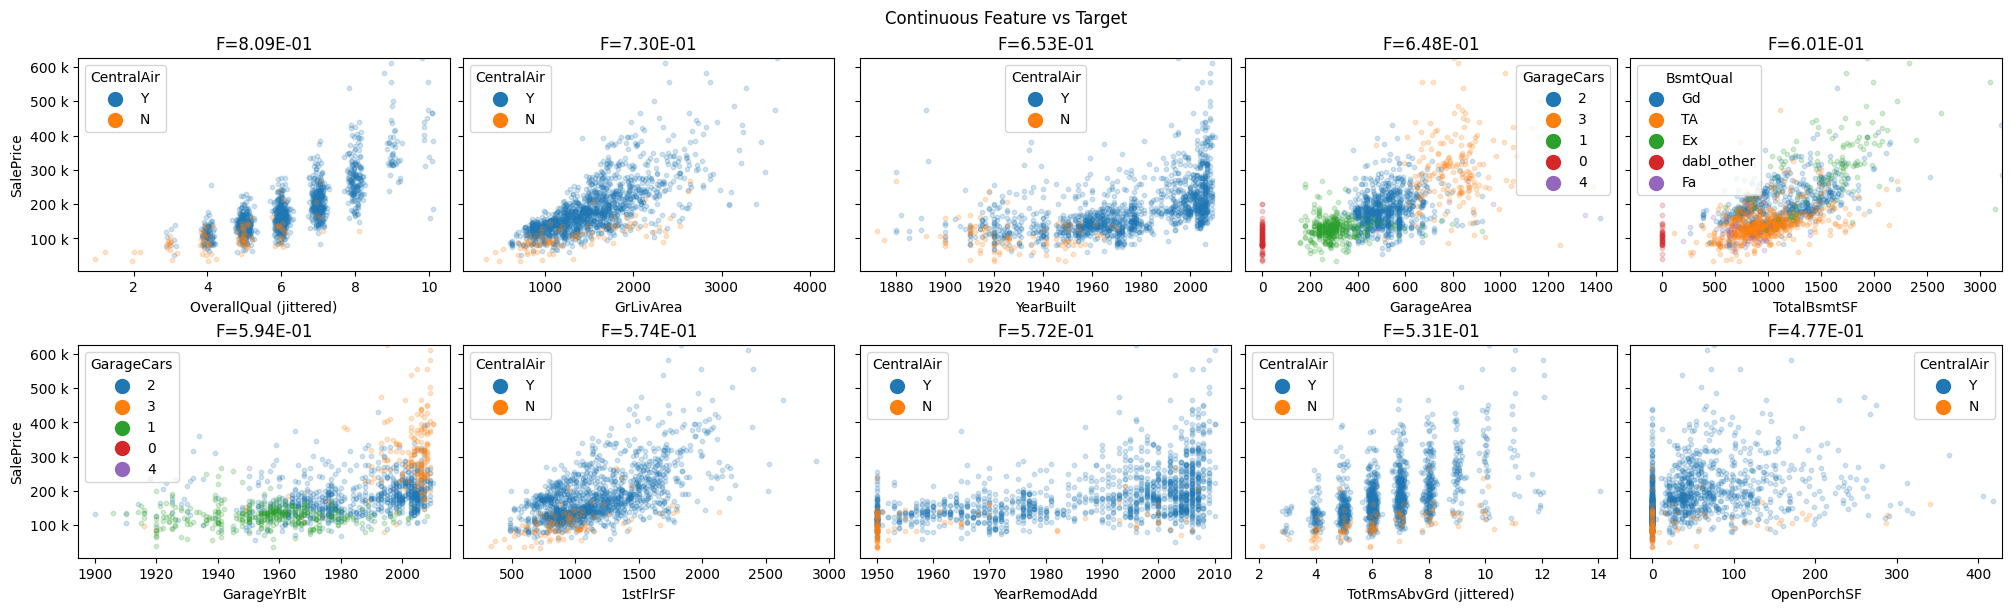

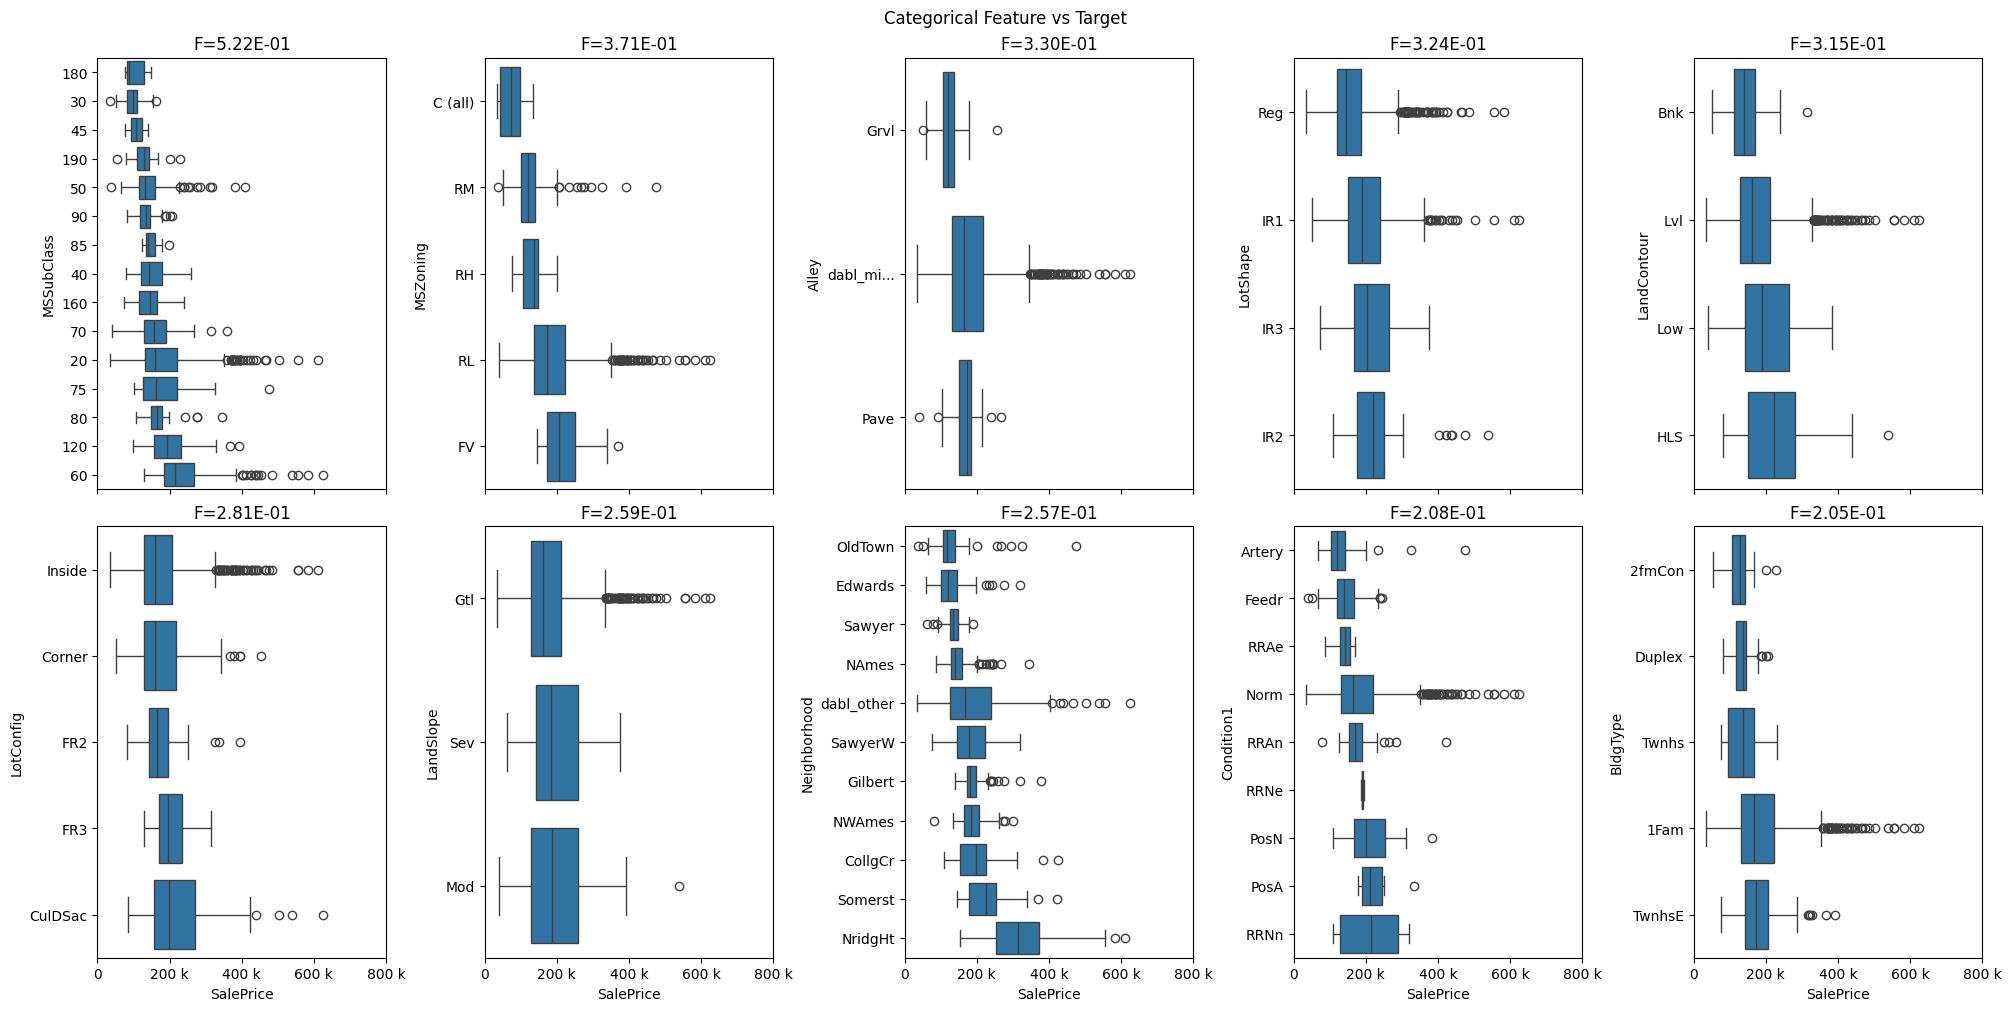

In [11]:
import dabl
dabl.plot(data, target_col = 'SalePrice')

# Introduction to Probability

## Basic Probability

* Let's start with a simple example: Say, we flip a fair coin

* Intuitively, there's a 50% chance of getting heads, and a 50% chance of getting tails. This is because there are only two possible outcomes, and each event is equally likely.

* Therefore, we can say that the Probability of getting a Heads is 0.5. Similarly, Probability of getting a Tails is 0.5

* Probability can roughly be described as **the chance of an event or sequence of events occurring**.

* **Experiment** – are the uncertain situations, which could have multiple outcomes. A coin toss is an experiment.
* **Outcome** is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is “Heads”
* **Event** is one or more outcomes from an experiment. “Tails” is one of the possible events for this experiment.

### Rules

* The Probability that an event occurs with certainty is 1
* The Probability that an event will not occur surely is 0
* The Probability of the complement of an event is 1 minus the probability of that event.

* The probability of at least 1 of 2 (or more) things that can not simultaneously occur (mutually exclusive) is the sum of their respective probabilities

* **Mutually exclusive is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time.**

For any 2 events A & B, the probability that at least one occurs is the sum of their individual probabilities minus the probability of their intersection. i.e


$$ P(A\cup B) = P(A) + P(B) - P(A\cap B) $$

Example

The National Sleep Foundation reports that around 3% of the American population has sleep-breathing issues. They also report that around 10% of the American population has restless leg syndrome. Does this imply that 13% of people will have at least one of these problems?

Answer: No, the events can occur simultaneously and so are not mutually exclusive. To elaborate:

* **Let's check out the Probability of picking a house in the Neighborhood - "OldTown"**


No. of houses in OldTown/Total no. of houses
Let's go through this in Python

In [12]:
data.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
# lets check the different neighborhoods
data['Neighborhood'].value_counts()[:10]

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
Name: count, dtype: int64

In [15]:
# total number of houses in the neighborhood
all_houses = data.shape[0]
print("Total Number of Houses in the Neighborhood :", all_houses)

Total Number of Houses in the Neighborhood : 1460


In [16]:
# total number of houses in the Old town neighborhood
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print("Total Number of Houses in the Old Town Road :", houses_in_OldTown)


Total Number of Houses in the Old Town Road : 113


In [17]:
# lets find the probability of picking a House in the Old Town
probability = (houses_in_OldTown/all_houses)*100
print('Probability of picking a house in OldTown: {0:.2f}'.format(probability )+'%')

Probability of picking a house in OldTown: 7.74%


## Conditional Probability

* There are 10 candies in a bag: 5 green, and 5 blue.

* What is the probability of getting 3 blue candies in a row?

* The probability of getting the first blue candy is 5/10, or 1/2.

When we pick a blue candy, though, we remove it from the bag. We're left with 9 candies in total with (5-1 =)4 Blue ones.
So the probability of getting another blue is 4/9.
Similarly, the probability of picking a third blue candy is 3/8

Since we're calculating the probability of picking 1 Blue Candy AND 1 Blue Candy AND 1 Blue Candy

* Our final probability is **1/2 * 4/9 * 3/8, or .0833**. So, there is an 8.3% chance of picking three blue candies in a row.
Simple tricks: Whenever you have to verbally say AND (like we just did above), you will want to MULTIPLY the probabilities
Whenever you have to verbally say OR, you will want to ADD the probabilities.

**GIVEN that we have the probability of picking a house in "OldTown" neighborhood, we go a step further and AGAIN pick a house from the SAME neighborhood ?**

In [19]:
## Enter condtional probability code
cond_prob = (houses_in_OldTown/all_houses) *((houses_in_OldTown - 1)/(all_houses - 1))
print("The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is {0:.9f}".
      format(cond_prob*100))

The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is 0.594139352


## Simple Probability Distribution

* Lets Take an example, that we throw a dice of containing six faces.
* so, there are Total no. of Combinations = 6*6 = 36

Let’s see how:

2 {(1,1)} => 1/36

3 {(1,2),(2,1)} => 2/36

4 {(2,2),(3,1),(1,3)} => 3/36

5 {(1,4),(4,1),(2,3),(3,2)} => 4/36

6 {(3,3),(1,5),(5,1),(2,4),(4,2)} => 5/36

7 {(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)} => 6/36

8 {(2,6),(6,2),(3,5),(5,3),(4,4)} => 5/36

9 {(3,6),(6,3),(5,4),(4,5)} => 4/36

10 {(4,6),(6,4),(5,5)} => 3/36

11 {(5,6),(6,5)} => 2/36

12 {(6,6)} = > 1/36

## PDF and PMF

* The probability distribution for a discrete random variable is the **probability mass function** for that variable and similarly and if our random variable takes continuous values the distribution is called a **probability density function**.

* In the previous what we plotted was the Probability Mass Function of a Discrete Random Variable (X which is the sum of two fair dies)

* One of the most common Probability Distribution Functions is the Normal Distribution.


## Normal Distrution

* Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

### Checking for Skewness of the data

* We Generally check Askewness in the Target Columns of the data.
* Skewness is a state of distribution where the distribution is highly biased towards the right or left side of the plot.

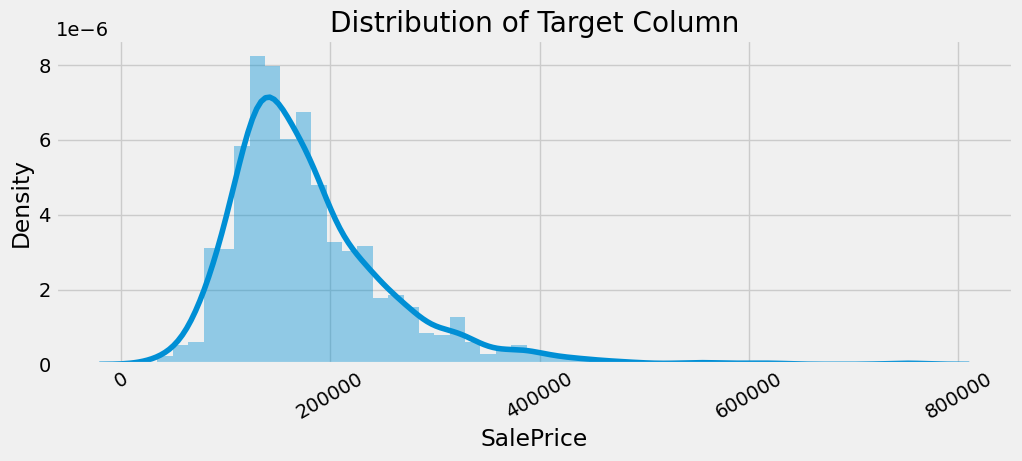

In [20]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(data['SalePrice'])
plt.title('Distribution of Target Column')
plt.show()

* The distribution for our target variable aka SalePrice doesn't resemble a normal distribution, it is skewed to the right
* If we remove the outliers, it'd somewhat resemble a Normal Dstribution

## Z-Score

* The number of standard deviations from the mean is also called the "Standard Score", "sigma" or "z-score".

* Let's take an example to better understand the meaning of z-score
    * Let's Suppose the average height of a Student in a class is 1.4 meters
    * In that same class one of the students is 1.85m tall
    * You can see on the bell curve that 1.85m is 3 standard deviations from the mean of 1.4.
    * so, the student with 1.85m height has a **z-score" of 3.0**.

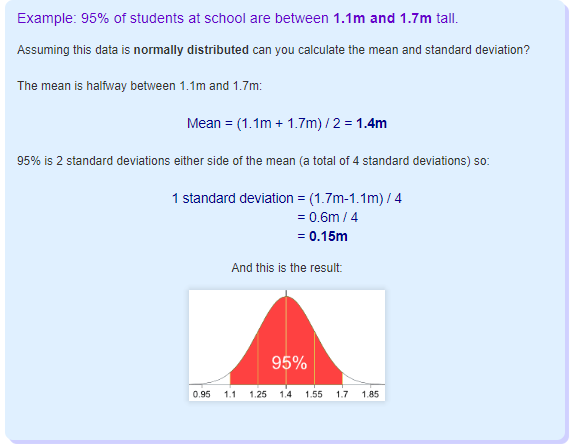

## Probability Distributions
Probability distributions are mathematical functions that describe the likelihood of different outcomes in a random event.

In data science, probability distributions are used to model and analyze various types of data, such as continuous or discrete variables.

They provide important information about the central tendency, variability, and shape of data, and can be used to make predictions about future events.

There are many different types of probability distributions, each with its own characteristics and applications, including normal distribution, binomial distribution, Poisson distribution, and many others.

## Probability Distributions


The likelihood of various events can be described using probability distributions. The most typical distribution is bell-shaped and has a normal distribution. The likelihood of success or failure in a sequence of independent trials is modelled by the binomial distribution. When the sample size is small, the t-distribution is employed. For testing hypotheses, the chi-squared distribution is utilised.

## Here are some examples of how they are used in the real world:

- Height and weight measurements, IQ scores, and test scores frequently follow a normal distribution.
- Flipping a coin, rolling a die, or conducting a survey with yes/no questions are all examples of binomial distribution.
- When sample sizes are small and population variance is unknown, the T-distribution is used in medical research.
- Chi-squared distribution: used to see if observed data fits a theoretical model, such as determining the fairness of a coin.

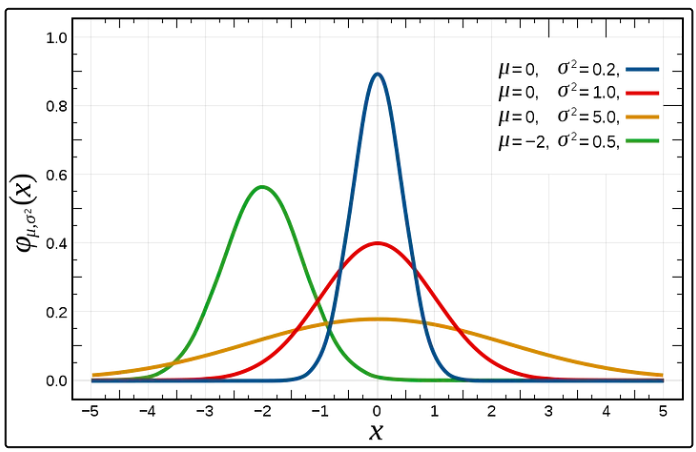

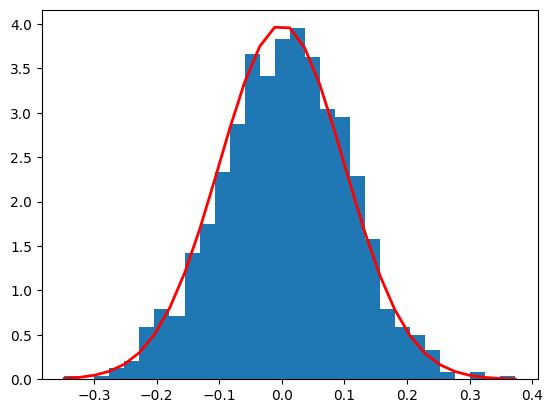

In [ ]:
# Python code for generating a normal distribution
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

## Types of Probability Distributions
There are many types of probability distributions, but some of the most common ones are:

- Normal distribution: A symmetric bell-shaped curve that represents the distribution of many natural phenomena, such as height or weight.
- Binomial distribution: A discrete distribution that represents the probability of a certain number of successes in a fixed number of independent trials.
- Poisson distribution: A discrete distribution that represents the probability of a certain number of events occurring in a fixed interval of time or space.
- Exponential distribution: A continuous distribution that represents the probability of waiting a certain amount of time for an event to occur.
- Uniform distribution: A continuous distribution where all outcomes are equally likely.


To identify which distribution to use for a particular dataset, it’s important to look at the shape of the data and the nature of the variable being measured.

For example, if the variable is continuous and symmetric, a normal distribution may be appropriate. If the variable is discrete and represents a count, a Poisson or binomial distribution may be more appropriate.

Probability Mass Function (PMF) and Probability Density Function (PDF)
Probability Mass Function (PMF) and Probability Density Function (PDF) are two important concepts in probability theory and statistics.

PMF is used for discrete random variables and gives the probability of each possible outcome.

PDF is used for continuous random variables and gives the probability density at each possible value of the variable.


In Python, we can use the scipy.stats module to calculate PMF and PDF.

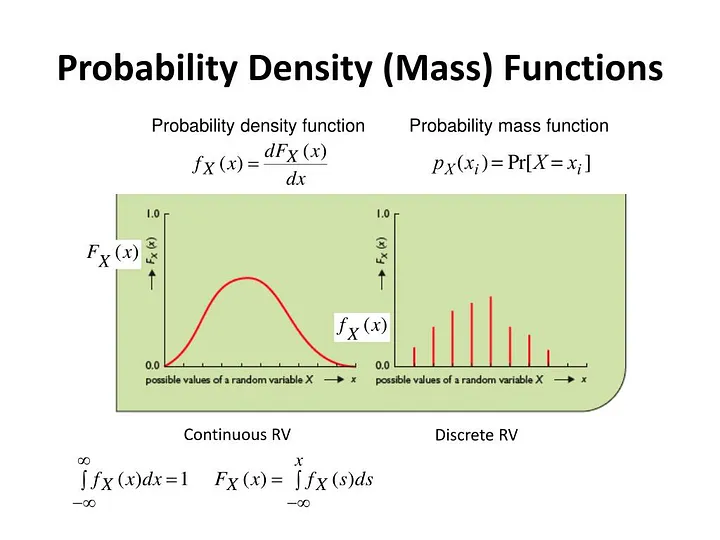

In [ ]:
import numpy as np
from scipy.stats import norm

# generate a random dataset
data = np.random.normal(0, 1, 100)

# calculate PMF : Descrit feature
pmf, bins = np.histogram(data, bins=10, density=True)
print(pmf)

# calculate PDF : Continuous
pdf = norm.pdf(bins, np.mean(data), np.std(data))
print(pdf)

[0.03564494 0.08911236 0.16040225 0.39209439 0.40991687 0.3208045
 0.26733709 0.07128989 0.01782247 0.01782247]
[0.01125557 0.04571926 0.13182919 0.26983887 0.39208301 0.40441953
 0.29611936 0.1539154  0.05679079 0.01487491 0.00276574]


To determine which one to use, we need to consider whether the random variable is discrete or continuous.

If it is discrete, we use PMF, and if it is continuous, we use PDF.

# Basic Probability

### In a single toss of 2 fair (evenly-weighted) six-sided dice, find the probability that their sum will be at most 9.

In [ ]:
import math
from fractions import Fraction

dice_max = 6
dice_min = 1
dice_range = range(dice_min, dice_max + 1)
count = 0
for d1 in dice_range:
    for d2 in dice_range:
        if (d1 + d2) <= 9:
            count += 1
possibilities = dice_max**2
print(Fraction(count, possibilities))

5/6


### In a single toss of  2 fair (evenly-weighted) six-sided dice, find the probability that the values rolled by each die will be different and the two dice have a sum of 6.

In [ ]:
from fractions import Fraction

dice_max = 6
dice_min = 1
dice_range = range(dice_min, dice_max+1)
print(dice_range)
count = 0
for d1 in dice_range:
    for d2 in dice_range:
        if (d1 != d2) and (d1+d2 == 6):
            count+=1
possibilities = dice_max**2
print(Fraction(count, possibilities))

range(1, 7)
1/9


## Compound Event Probability

### One ball is drawn from each of the 3 urns. What is the probability that, of the 3 balls drawn, 2 are red and 1 is black?


In [ ]:
from fractions import Fraction

ux_red = 4
ux_black = 3
ux_total = ux_red+ux_black

uy_red = 5
uy_black = 4
uy_total = uy_red+uy_black

uz_red = 4
uz_black = 4
uz_total = uz_red+uz_black

px_red = Fraction(ux_red, ux_total)
px_black = Fraction(ux_black, ux_total)

py_red = Fraction(uy_red, uy_total)
py_black = Fraction(uy_black, uy_total)

pz_red = Fraction(uz_red, uz_total)
pz_black = Fraction(uz_black, uz_total)

possibility = px_red * py_red * pz_black + px_red * py_black * pz_red + px_black * py_red * pz_red
print(possibility)

17/42


# Binomial Distribution

In [ ]:
def fact(n):
    return 1 if n == 0 else n*fact(n-1)

def comb(n, x):
    return fact(n) / (fact(x) * fact(n-x))

def b(x, n, p):
    return comb(n, x) * p**x * (1-p)**(n-x)

l, r = list(map(float, input().split(" ")))
odds = l / r
print(round(sum([b(i, 6, odds / (1 + odds)) for i in range(3, 7)]), 3))

In [ ]:
def fact(x):
    return 1 if x==1 else x*fact(x-1)

def comb(x, n):
    return fact(x)/(fact(n)*fact(n-x))

def b(n, x, p):
    return comb(x, n)*p**x*(1-p)**(n-x)

l, r = list(map(float, input().split(" ")))

odds = l/r
print(round(sum([b(i, 6, odds/(1+odds)) for i in range(3, 7)]), 3))

In [ ]:
odds = 1.08/1
odds

In [ ]:
def fact(n):
    return 1 if n == 0 else n*fact(n-1)

def comb(n, x):
    return fact(n) / (fact(x) * fact(n-x))

def b(x, n, p):
    return comb(n, x) * p**x * (1-p)**(n-x)

p, n = list(map(int, input().split(" ")))
print(round(sum([b(i, n, p/100) for i in range(3)]), 3))
print(round(sum([b(i, n, p/100) for i in range(2, n+1)]), 3))

In [ ]:
## geometric distribution

def geo(n, p):
    return (1-p)**(n-1)*p

In [ ]:
geo(12, 3)

In [ ]:
frac=input().split(' ')
n=int(input())
p=int(frac[0])/int(frac[1])
q=1-p
prob=1-q**n
print(round(prob,3))

# Discrete Probability Distributions

## Bernoulli and Binomial Distributions

A Bernoulli Distribution is the probability distribution of a random variable which takes the value 1 with probability p and value 0 with probability 1 – p, i.e.

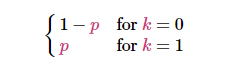


## Example

**We want to know, out of a random sample of 10 people, what is the probability of 3 of these 10 people being left handed?**

* let's assume that the prob of left handed people is 10% or 0.1 and probability of right handed people if 90% or 0.9.
* we have to add up all the ways we can arrange the 3 people being picked.

There are 10! ways to arrange 10 people and there are 3! ways to arrange the 3 people that are picked and 7! ways to arrange the 7 people that aren’t picked.

This is given as:
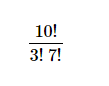

In [ ]:
from math import factorial

factorial(10) / (factorial(3) * factorial(7))

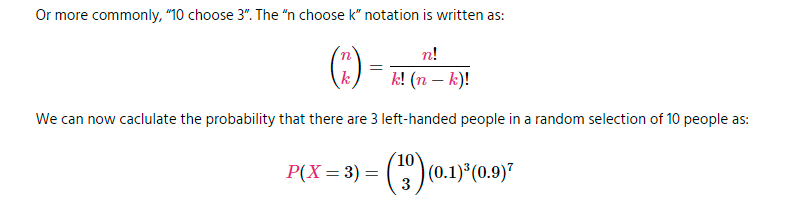

In [ ]:
# parameters are k, n and p
from scipy.stats import binom

binom.pmf(3, 10, 0.1)

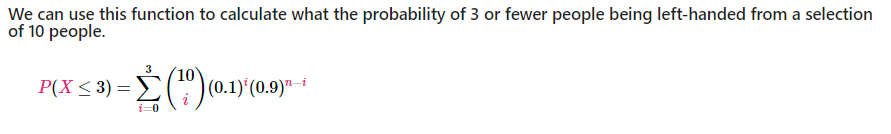

In [ ]:
sum([binom.pmf(x, 10, 0.1) for x in range(4)])

we could plot our probability results for each value up to all 10 people being left-handed:

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(11), [binom.pmf(x, 10, 0.1) for x in range(11)])
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.title('Binomial PMF')
plt.show()

We can see there is almost negligible chance of getting more than 6 left-handed people in a random group of 10 people

# Roulette

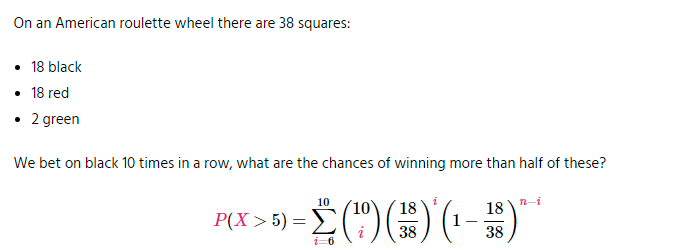

In [ ]:

p = 18 / 38
sum([binom.pmf(x, 10, p) for x in range(6, 11)])

Poisson Distribution
A Poisson distribution is a limiting version of the binomial distribution, where n becomes large and np approaches some value λ, which is the mean value.

The Poisson distribution can be used for the number of events in other specified intervals such as distance, area or volume. Examples that may follow a Poisson include the number of phone calls received by a call center per hour and the number of decay events per second from a radioactive source.

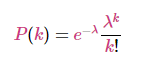

The average number of goals in a World Cup football match is 2.5.

We would like to know the probability of 4 goals in a match.